<a href="https://colab.research.google.com/github/SewoongPark/SeSac_study_repo/blob/main/mnist_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

[5 0 4 1 9 2 1 3 1 4]


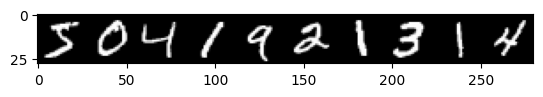

In [48]:
import matplotlib.pyplot as plt
import numpy as np

img = np.hstack(x_train[:10])
plt.imshow(img, cmap = "gray")
print(y_train[:10])

**10개의 라벨 중에서 분류하는 다항 분류 task**
* 반드시 원핫인코딩 해주어야 함
* loss함수를 `sparse_Categorical_crossentrophy`로 지정해줄 시 알아서 원핫인코딩 함

In [49]:
len(y_train), len(y_test), np.unique(y_train, return_counts = True)

(60000,
 10000,
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])))

In [50]:
# 28 * 28 흑백 이미지 60000, 10000장
np.shape(x_train), np.shape(x_test)

((60000, 28, 28), (10000, 28, 28))

In [51]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'), # parameter 계산: w(28 * 28) + b(1) * 100
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**모델 구조 및 결과 시각화**

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.weights[:10] #78500개의 params

[<tf.Variable 'dense_8/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[ 0.04230648,  0.02210847, -0.00073674, ..., -0.07818484,
          0.05496535, -0.06170717],
        [-0.02227657, -0.07511667, -0.0535548 , ..., -0.06327952,
          0.01621638,  0.0422317 ],
        [ 0.03436336, -0.06436048,  0.04342419, ..., -0.06755383,
         -0.01280735,  0.01866252],
        ...,
        [-0.02037691,  0.04445022,  0.03642219, ..., -0.02515654,
          0.00991421, -0.01787248],
        [ 0.04946189, -0.01632593,  0.02596191, ...,  0.05174957,
          0.05225632, -0.0151009 ],
        [ 0.0268011 , -0.05688671, -0.04977157, ..., -0.0423766 ,
         -0.04791133, -0.03807449]], dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

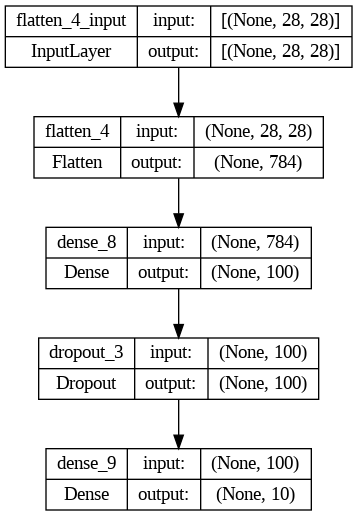

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = "model.png", show_shapes = True)

**모델 훈련 및 평가**

In [55]:
history = model.fit(x_train, y_train, epochs = 5, validation_data=(x_train, y_train), batch_size = 100) # model.complie다시 하고 fit하는게 적절함

Epoch 1/5
600/600 [==============================] - 5s 7ms/step - loss: 0.3970 - accuracy: 0.8856 - val_loss: 0.1956 - val_accuracy: 0.9451
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1960 - accuracy: 0.9436 - val_loss: 0.1303 - val_accuracy: 0.9633
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.1487 - accuracy: 0.9569 - val_loss: 0.0985 - val_accuracy: 0.9718
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.1247 - accuracy: 0.9627 - val_loss: 0.0788 - val_accuracy: 0.9775
Epoch 5/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1067 - accuracy: 0.9685 - val_loss: 0.0709 - val_accuracy: 0.9793


In [56]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0950 - accuracy: 0.9716 - 629ms/epoch - 2ms/step


[0.09501305222511292, 0.9715999960899353]

In [63]:
print(type(history))
print(history.history.keys())

<class 'keras.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[0.885616660118103, 0.9436166882514954, 0.956933319568634, 0.9627000093460083, 0.9685333371162415]
[0.9450500011444092, 0.963283360004425, 0.971750020980835, 0.977483332157135, 0.9792666435241699]
--------------------------------------------------
[0.3970475196838379, 0.19598808884620667, 0.14873117208480835, 0.12465526163578033, 0.10670679807662964]
[0.19559022784233093, 0.13033317029476166, 0.09854569286108017, 0.0787980780005455, 0.07090164721012115]


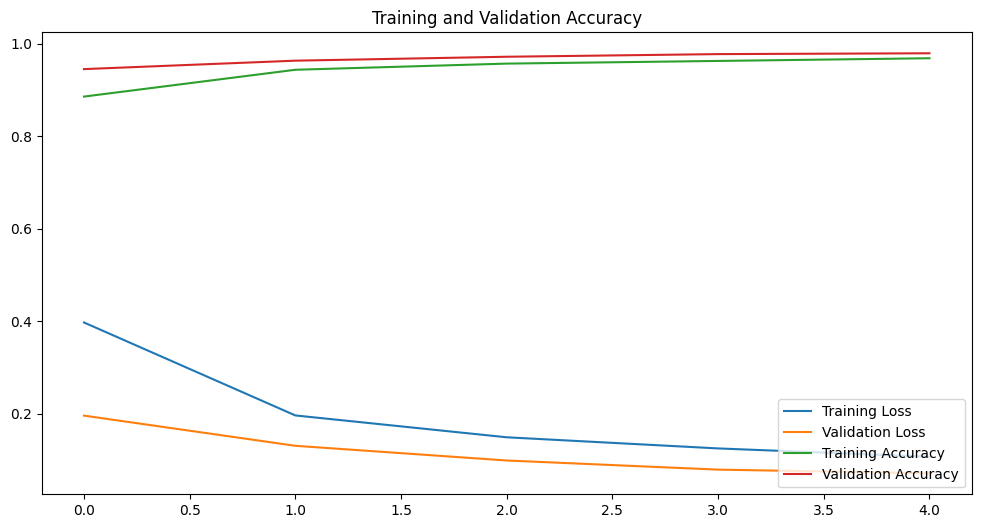

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(acc)
print(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']
print("-"* 50)
print(loss)
print(val_loss)

epochs_range = range(5)

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()


### 모델 저장
* weight값만 저장하거나 모델 전체를 저장할 수 있음

In [58]:
model.save_weights("mnist_model_weights.h5")

In [59]:
model.save("mnist_model.h5")

**모델이 계산한 클래스 분류 확률 반환**

In [65]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [68]:
probability_model(x_test[:5]) # 확률 반환
# 각 행은 각 샘플에 대한 결과, 각 열은 클래스에 대한 확률
# 5는 샘플의 수(x_test[:5]), 10은 클래스의 수

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08533971, 0.08533967, 0.0853432 , 0.08535434, 0.08533967,
        0.08534001, 0.08533967, 0.23192298, 0.08533975, 0.08534099],
       [0.08535647, 0.0853873 , 0.23168798, 0.08543599, 0.08535451,
        0.08535771, 0.08535489, 0.08535451, 0.08535612, 0.08535451],
       [0.08538412, 0.23122694, 0.08542116, 0.08539051, 0.0853921 ,
        0.08539374, 0.08538602, 0.08560599, 0.08541409, 0.08538535],
       [0.2318935 , 0.08534154, 0.08535397, 0.08534184, 0.0853419 ,
        0.08534167, 0.08534174, 0.08535144, 0.0853416 , 0.08535076],
       [0.08543686, 0.08543354, 0.08544127, 0.08543339, 0.23043302,
        0.08543369, 0.08543947, 0.08544394, 0.08543367, 0.08607115]],
      dtype=float32)>

**학습한 모델로 새로운 데이터 예측하기**

In [70]:
load_model = tf.keras.models.load_model("mnist_model.h5")

(28, 28)


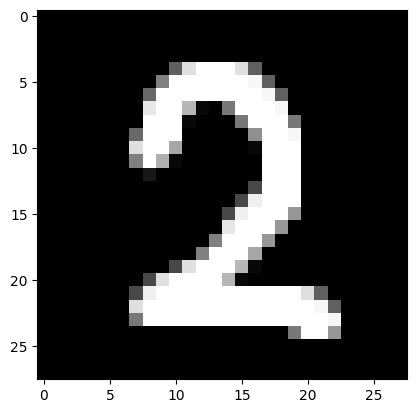

In [84]:
from PIL import Image
img = Image.open("num2.png").resize((28, 28)).convert("L")
img = np.array(img);img=255 - img;img = img / 255.0


print(np.shape(img)) # x_train의 shape은 (60000, 28, 28)
plt.imshow(img, cmap = "gray")

In [89]:
new_img = np.reshape(img, (1, 28, 28)) # 훈련 데이터가 3차원이기 때문에 맞춰주기
np.shape(new_img)

(1, 28, 28)

In [91]:
model.predict(new_img) # y값이 원핫인코딩되어서 들어간 자료에서만 사용

1/1 [==============================] - 0s 141ms/step


array([[2.2795282e-06, 1.1638895e-06, 9.9970704e-01, 2.7722883e-04,
        6.4132846e-13, 9.9602648e-06, 1.0424284e-10, 2.5275128e-07,
        2.0243244e-06, 5.1271240e-08]], dtype=float32)

In [97]:
# y값에서 원핫인코딩하지 않을 시 model의 loss함수에서 sparse_categorical_crossentropy, tf.nn.softmax로 예측 수행해야 함
prediction = model(new_img)
result = tf.nn.softmax(prediction) # 총합이 1이 됨
num = np.argmax(result) # 최대 값의 인덱스 반환

In [98]:
### 만약 레이블이 따로 있다면
class_num = ['숫자0', '숫자1', '숫자2', '숫자3', '숫자4' '숫자5', '숫자6', '숫자7', '숫자8', '숫자9']
class_num[num]

'숫자2'

(30, 28, 28)


array([2])

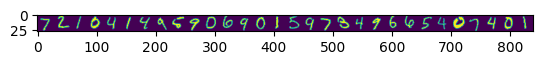

In [106]:
testData = x_test[:30]
print(np.shape(testData))

prediction = model(new_img)
result = tf.nn.softmax(prediction)

plt.imshow(np.hstack(testData))
np.argmax(result, axis = 1) # 열 단위에서 최대값 반환